In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
import cv2
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.applications.vgg16 import VGG16
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,Activation,MaxPooling2D
%matplotlib inline

In [73]:
base_path = "Desktop/DATASET/"
base_path_2 = "Desktop/dataset2/"

In [74]:
i=1
n = 14
x=[]
y=[]
size = (96,96)

In [75]:
 while(i<=n):
    file = str(i)+".jpg"
    file_path = base_path + file
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2YCrCb)
    img = cv2.resize(img,size)
    x.append(img)
    y.append("santosh")
    i = i+1

In [76]:
i=1
n=4
while(i<=n):
    file = str(i)+".jpg"
    file_path = base_path_2 + file
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2YCrCb)
    img = cv2.resize(img,size)
    x.append(img)
    y.append("random person")
    i = i+1

In [77]:
z=[]
z = y

In [78]:
nb_classes = 2
encoder = LabelEncoder()
encoder_y = encoder.fit_transform(y)
y_onehot = np_utils.to_categorical(encoder_y,nb_classes)

In [79]:
x = np.array(x)
y = np.array(y)
y_onehot = np.array(y_onehot)
x = shuffle(x,random_state = 7)
y = shuffle(y,random_state = 7)
y_onehot = shuffle(y_onehot,random_state = 7)

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y_onehot,test_size = 0.25 , random_state = 7)

In [81]:
x_train.shape

(13, 96, 96, 3)

In [86]:
model=Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=3,input_shape=(96,96,3),activation="relu"))
model.add(Conv2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(kernel_size=(3,3),filters=3,activation="relu"))
model.add(Conv2D(kernel_size=(5,5),filters=5,activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=10))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(100,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

filepath="./saved_models/best_model_6k96_ignore.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model.compile(optimizer="adadelta",loss="categorical_crossentropy",metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 94, 94, 3)         84        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 94, 94, 10)        280       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 47, 47, 10)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 45, 45, 3)         273       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 41, 41, 5)         380       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 20, 20, 5)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 10)       

In [87]:
model.fit(x_train,y_train, validation_data=(x_test,y_test),batch_size=32,epochs=13,callbacks=[checkpoint])

Train on 13 samples, validate on 5 samples
Epoch 1/13
13/13 [==============================] - 0s 36ms/step - loss: 6.2686 - accuracy: 0.6154 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/13
13/13 [==============================] - 0s 8ms/step - loss: 9.5068 - accuracy: 0.6923 - val_loss: 102.0115 - val_accuracy: 0.0000e+00
Epoch 3/13


/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


13/13 [==============================] - 0s 8ms/step - loss: 54.7466 - accuracy: 0.3077 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/13
13/13 [==============================] - 0s 9ms/step - loss: 27.8813 - accuracy: 0.6923 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/13
13/13 [==============================] - 0s 9ms/step - loss: 2.7512 - accuracy: 0.6923 - val_loss: 1.4305e-07 - val_accuracy: 1.0000
Epoch 6/13
13/13 [==============================] - 0s 10ms/step - loss: 1.9666 - accuracy: 0.8462 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/13
13/13 [==============================] - 0s 9ms/step - loss: 2.3358 - accuracy: 0.7692 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 8/13
13/13 [==============================] - 0s 10ms/step - loss: 6.1621e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 9/13
13/13 [==============================] - 0s 8ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.

In [88]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 6ms/step


[0.0, 1.0]

In [89]:
cls = ['random person','santosh']
def get_preds(x,model):
    img = cv2.resize(x,(96,96))
    img = np.reshape(img,(1,96,96,3))
    pr = model.predict(img)    
    pr = np.array(pr)[0]
    idx = np.argmax(pr)
    conf = round(pr[idx]*100,2)
    lab = cls[idx]
    return lab,conf

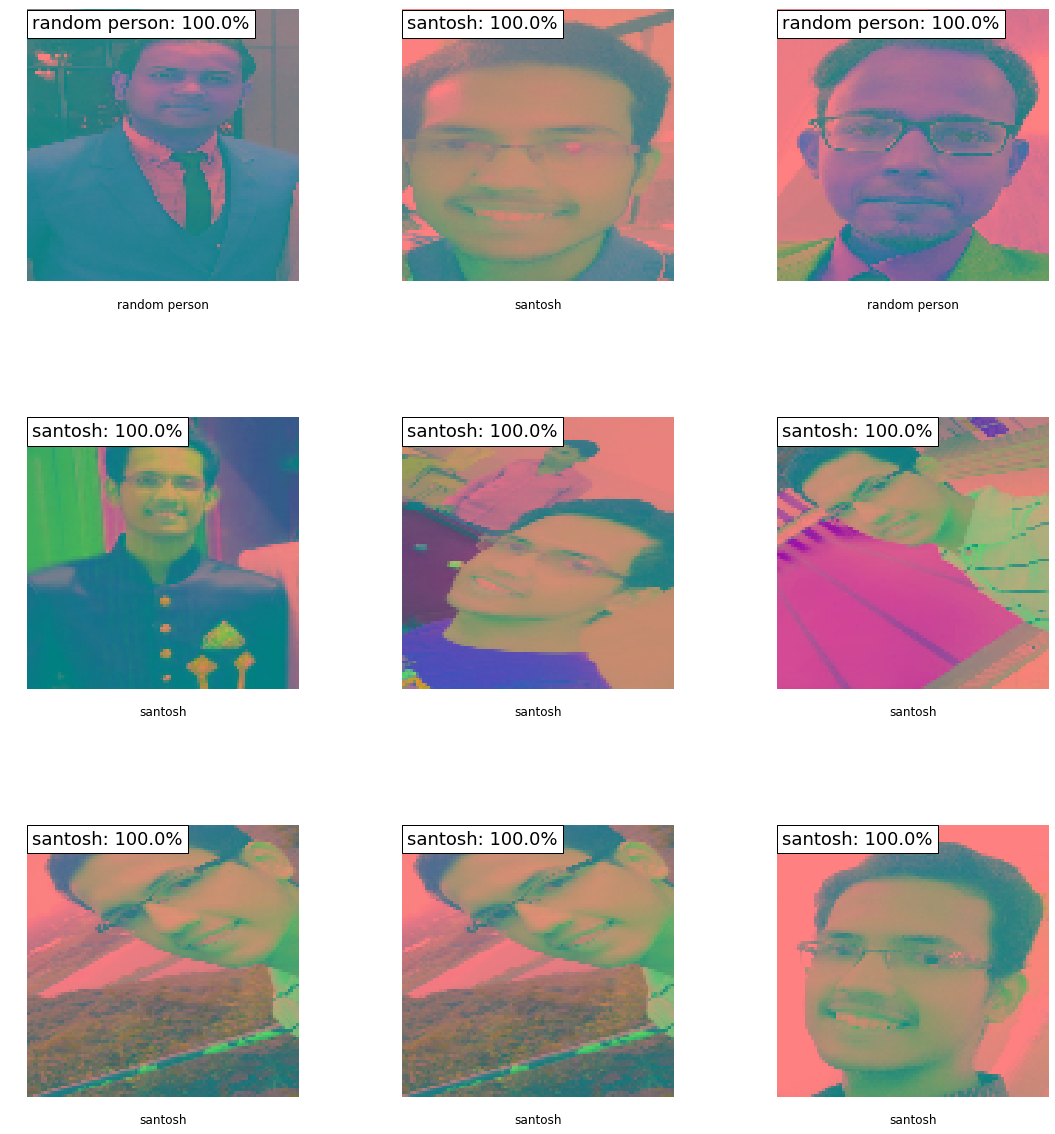

In [90]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.figure(figsize = (20,20))
gs1 = gridspec.GridSpec(3,3)
gs1.update(wspace=0.025, hspace=0.5)
padding = 5
for i in range(0, 9):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    ax1 = plt.subplot(gs1[i])
    ax1.axis("off")
    ax1.text(0.5,-0.1, "{0}".format(y[i]), size=12, ha="center", transform=ax1.transAxes)
    pr,conf = get_preds(x[i],model)
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr,conf),
    fontsize = 18,
    xy=(0, 0), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='left',
    )
    
    ax1.imshow(x[i])


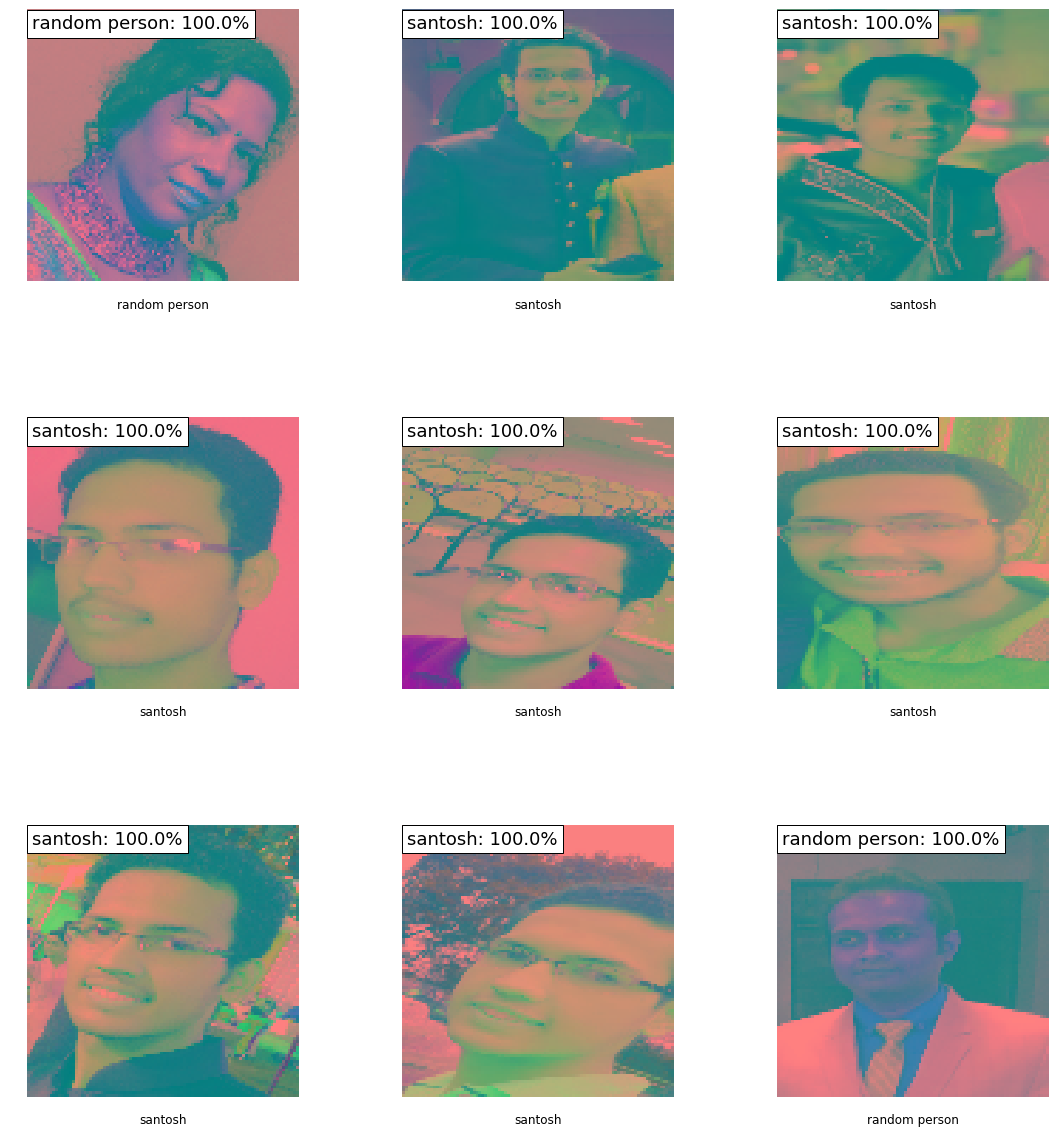

In [91]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.figure(figsize = (20,20))
gs1 = gridspec.GridSpec(3,3)
gs1.update(wspace=0.025, hspace=0.5)
padding = 5
for i in range(0, 9):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    ax1 = plt.subplot(gs1[i])
    ax1.axis("off")
    ax1.text(0.5,-0.1, "{0}".format(y[i+9]), size=12, ha="center", transform=ax1.transAxes)
    pr,conf = get_preds(x[i+9],model)
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr,conf),
    fontsize = 18,
    xy=(0, 0), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='left',
    )
    
    ax1.imshow(x[i+9])


In [61]:
y

array(['santosh', 'santosh', 'santosh', 'santosh', 'santosh', 'santosh',
       'santosh', 'santosh', 'santosh', 'santosh', 'santosh', 'santosh',
       'santosh', 'santosh', 'random person', 'random person',
       'random person', 'random person'], dtype='<U13')

In [62]:
y_onehot

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [63]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [85]:
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)